## Determining new oil well locations
___
For this project, oil field conditions will be analyzed in order to predict the best sites for new wells. Oil well parameters and oil well volumes have been collected for three areas of interest.




Model Building:
You've built separate Ridge regression models for each region.
Ensure you've thoroughly validated the models (especially location 2).
Prediction:
Use each region's model to predict the oil reserve volume for new wells within that region.
You'll need a dataset of well parameters for potential new wells in each region.





Analyzing oil field conditions in order to predict location reservs volumes. Data was collected from 3 potential sites. 



Steps to choose the location:

Collect the oil well parameters in the selected region: oil quality and volume of reserves;

Build a model for predicting the volume of reserves in the new wells;

Pick the oil wells with the highest estimated values;
Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. 

Parameters of each oil well in the region are already known. 

Build a model that will help to pick the region with the highest profit margin.
 
Analyze potential profit and risks using the Bootstrapping technique.

Project instructions
Download and prepare the data. Explain the procedure.
Train and test the model for each region:

check plit the data into a training set and validation set at a ratio of 75:25.

 2.2. Train the model and make predictions for the validation set.

 2.3. Save the predictions and correct answers for the validation set.

 2.4. Print the average volume of predicted reserves and model RMSE.

 2.5. Analyze the results.

Prepare for profit calculation:

 3.1. Store all key values for calculations in separate variables.

 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

 3.3. Provide the findings about the preparation for profit calculation step.

Write a function to calculate profit from a set of selected oil wells and model predictions:

 4.1. Pick the wells with the highest values of predictions. 

 4.2. Summarize the target volume of reserves in accordance with these predictions

 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

Calculate risks and profit for each region:

     5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.

     5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

     5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

Data description
Geological exploration data for the three regions are stored in files:

geo_data_0.csv. download dataset
geo_data_1.csv. download dataset
geo_data_2.csv. download dataset
id — unique oil well identifier
f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
product — volume of reserves in the oil well (thousand barrels).
Conditions:

Only linear regression is suitable for model training (the rest are not sufficiently predictable).
When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
The budget for development of 200 oil wells is 100 USD million.
One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
The data is synthetic: contract details and well characteristics are not disclosed.

Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before moving on to the task.

Here’s what the reviewers will look at when reviewing your project:

How did you prepare the data for training?
Have you followed all the steps of the instructions?
Have you taken into account all the business conditions?
What are your findings about the task study?
Have you applied the Bootstrapping technique correctly?
Have you suggested the best region for well development? Is the choice justified?
Did you avoid code duplication?
Have you kept to the project structure and kept the code neat?
The Knowledge Base has everything you need to complete the project.

Good luck!



################################################


Excellent! Building separate models for each location is a great strategy. Let's dive into how to "look under the hood" of linear regression and extract valuable insights.

1. Model Coefficients:

What They Represent:
The coefficients of a linear regression model represent the change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.   
The sign of the coefficient indicates the direction of the relationship (positive or negative).   
The magnitude of the coefficient indicates the strength of the relationship.   
How to Access Them:
Python

# Assuming 'model' is your trained LinearRegression or Ridge model
coefficients = model.coef_
intercept = model.intercept_  # The y-intercept

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# If you have feature names:
feature_names = feature_train.columns  # Assuming feature_train is a DataFrame
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)
Interpretation:
Large positive coefficients indicate a strong positive relationship.
Large negative coefficients indicate a strong negative relationship.   
Coefficients close to zero indicate a weak relationship.
Comparing the magnitude of the coefficients will give you an idea of feature importance.
2. Residual Analysis:

What They Represent:
Residuals are the differences between the actual target values and the predicted target values.   
They represent the errors made by the model.   
How to Analyze Them:
Residual Plots:
Scatter plots of residuals vs. predicted values.
Scatter plots of residuals vs. each feature.
These plots help you assess the linearity, homoscedasticity, and independence assumptions of linear regression.
Histograms of Residuals:
Check if the residuals are normally distributed (a key assumption of linear regression).
Interpretation:
Randomly scattered residuals around zero indicate a good fit.
Patterns in the residuals (e.g., curves, funnels) suggest violations of the assumptions.   
Non-normal residuals might indicate the presence of outliers or other issues.
3. Evaluation Metrics:

R-squared (Coefficient of Determination):
Measures the proportion of variance in the target variable that is explained by the model.
Ranges from 0 to 1 (higher is better).   
Limitations: Can be misleading if the model is overfit.
Mean Squared Error (MSE):
Measures the average squared difference between predicted and actual values.
Lower is better.
Sensitive to outliers.
Root Mean Squared Error (RMSE):
The square root of MSE.
In the same units as the target variable.
Easier to interpret than MSE.
Mean Absolute Error (MAE):
Measures the average absolute difference between predicted and actual values.
Less sensitive to outliers than MSE.
Lower is better.
Adjusted R-squared:
Modifies the R-squared value to account for the number of features in the model.
Useful when comparing models with different numbers of features.
F-statistic:
Tests the overall significance of the regression model.
P-values:
Tests the statistical significance of individual coefficients.
4. Feature Importance (Indirectly):

While linear regression doesn't have a built-in "feature importance" metric like tree-based models, you can infer importance from:
Coefficient Magnitudes: Larger coefficients (in absolute value) generally indicate more important features.
Correlation Analysis: Calculate the correlation between each feature and the target variable.
VIF (Variance Inflation Factor): Identifies multicollinearity (high correlation between features), which can affect coefficient estimates.   
5. Statistical Tests:

T-tests:
Test the statistical significance of individual coefficients.
F-tests:
Test the overall significance of the model.
Durbin-Watson test:
Test for autocorrelation in the residuals.
6. Confidence Intervals:

Calculate the confidence intervals of the coefficients, to see the range of values that the coefficient may have.
By using these techniques, you'll gain a thorough understanding of your linear regression models and be able to identify areas for improvement.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LassoCV, RidgeCV, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [27]:
# load all the data
data_one = pd.read_csv('geo_data_0.csv')
data_two = pd.read_csv('geo_data_1.csv')
data_three = pd.read_csv('geo_data_2.csv')

In [3]:
print(data_one.info())
print(data_two.info())
print(data_three.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [ ]:
data_one.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [56]:
data_two.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [57]:
data_three.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


thoughts
___
from .info()
- zero missing values, and column data types match across all datasets
- id column (from documentation) is a unique well identifier 
- product is our target column
from .describe()
- location 3 has the most oil, highest 25%, 50%, 75%, max
- each location is different. originally I thought to merge all data and construct the model, I now see that will just add noise to the data.\
- will need to scale, no need for encoding

### training splits
____

In [ ]:
dfs = [data_one, data_two, data_three]


def location_selecter(df):

    # prepare data for modeling
    counter = 0

    # loop through data
    for data in df:
        counter += 1
        print(f"Location: {counter}")

        # split data into features and target
        X = data.drop(['id', 'product'], axis=1)
        y = data['product']

        # train-test-split to create a portion of data that is hidden, to evaluate the model, and reduce over fitting
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=17)

        # scale the features
        scaler_x = StandardScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)

        # initalize the models for linear regression
        lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1,
                        10, 25, 50, 75, 100], cv=10)
        ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1,
                        10, 25, 50, 75, 100], cv=10)

        # fit the models
        lasso.fit(X_train_scaled, y_train)
        ridge.fit(X_train_scaled, y_train)

        # predict
        lasso_predict = lasso.predict(X_test_scaled)
        ridge_predict = ridge.predict(X_test_scaled)

        # evaluate the predictions
        rmse_lasso = root_mean_squared_error(y_test, lasso_predict)
        rmse_ridge = root_mean_squared_error(y_test, ridge_predict)

        r2_lasso = r2_score(y_test, lasso_predict)
        r2_ridge = r2_score(y_test, ridge_predict)

        # print metrics

        print()
        print("RidgeCV:")
        print(f"  Optimal Alpha: {ridge.alpha_}")
        print(f"  RMSE: {rmse_ridge}")
        print(f"  R-squared: {r2_ridge}")
        print()
        print("LassoCV:")
        print(f"  Optimal Alpha: {lasso.alpha_}")
        print(f"  RMSE: {rmse_lasso}")
        print(f"  R-squared: {r2_lasso}")

        if rmse_ridge < rmse_lasso:
            print("\nRidgeCV performs better (lower RMSE).")
            # find the actual alpha
            alpha = ridge.alpha_
            model = RidgeCV(
                alphas=[alpha + i * 0.5 for i in range(20)], cv=10)
        elif rmse_lasso < rmse_ridge:
            print("\nLassoCV performs better (lower RMSE).")
            # find the actual alpha
            alpha = lasso.alpha_
            if alpha <= 1:
                model = LassoCV(
                    alphas=[0.001, 0.01, 0.25, 0.5, 0.75, 1], cv=10)
            else:
                alpha -= 7
                model = LassoCV(
                    alphas=[alpha + i * 0.5 for i in range(20)], cv=10)
        else:
            print("\nRidgeCV and LassoCV have similar performance.")

        # find final parameters
        model.fit(X_train_scaled, y_train)
        model_predict = model.predict(X_test_scaled)

        # evaluate the predictions
        rmse = root_mean_squared_error(y_test, model_predict)
        r2 = r2_score(y_test, model_predict)

        # print metrics
        print(f"  Optimal Alpha: {model.alpha_}")
        print(f"  RMSE: {rmse}")
        print(f"  R-squared: {r2}")
        print()
        print(
            f"average oil reserve volume prediction is {model_predict.mean():.3f} thousand barrels")
        print(
            f"Actual average oil reserve {y_test.mean():.3f} thousand barrels")

In [70]:
location_selecter(dfs)

Location: 1

RidgeCV:
  Optimal Alpha: 25.0
  RMSE: 37.785959882586496
  R-squared: 0.27295451746790944

LassoCV:
  Optimal Alpha: 0.001
  RMSE: 37.785993480581666
  R-squared: 0.2729532245389198

RidgeCV performs better (lower RMSE).
  Optimal Alpha: 27.0
  RMSE: 37.7859570616443
  R-squared: 0.27295462602427345

average oil reserve volume prediction is 92.391 thousand barrels
Actual average oil reserve 92.832 thousand barrels
Location: 2

RidgeCV:
  Optimal Alpha: 0.01
  RMSE: 0.8867650950372972
  R-squared: 0.9996252665363823

LassoCV:
  Optimal Alpha: 0.001
  RMSE: 0.8867634292915237
  R-squared: 0.9996252679442187

LassoCV performs better (lower RMSE).
  Optimal Alpha: 0.001
  RMSE: 0.8867634292915237
  R-squared: 0.9996252679442187

average oil reserve volume prediction is 68.819 thousand barrels
Actual average oil reserve 68.811 thousand barrels
Location: 3

RidgeCV:
  Optimal Alpha: 25.0
  RMSE: 40.14301474110527
  R-squared: 0.1977642983566118

LassoCV:
  Optimal Alpha: 0.001


In [ ]:

print('location 1')
print(f"  RMSE: {rmse_1}")
print(f"  R-squared: {r2_1}")
print(
    f"Average oil reserve volume prediction is {predict_1.mean():.3f} thousand barrels")
print(
    f"Actual average oil reserve {target_test_1.mean():.3f} thousand barrels")
print()
print('location 2')
print(f"  RMSE: {rmse_2}")
print(f"  R-squared: {r2_2}")
print(
    f"Average oil reserve volume prediction is {predict_2.mean():.3f} thousand barrels")
print(
    f"Actual average oil reserve {target_test_2.mean():.3f} thousand barrels")
print()
print('location 3')
print(f"  RMSE: {rmse_3}")
print(f"  R-squared: {r2_3}")
print(
    f"Average oil reserve volume prediction is {predict_3.mean():.3f} thousand barrels")
print(
    f"Actual average oil reserve {target_test_2.mean():.3f} thousand barrels")

In [ ]:
# split data into features and target
X = data_one.drop(['id', 'product'], axis=1)
y = data_one['product']

# train-test-split to create a portion of data that is hidden, to evaluate the model, and reduce over fitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123)

In [5]:
# split data into features and target
feature = df.drop(['id', 'product'], axis=1)
target = df['product']

# train-test-split to create a portion of data that is hidden, to evaluate the model, and reduce over fitting
feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.25, random_state=999)

# separate the locations for final modeling
# split the target_test by location
target_test_1 = target_test[feature_test['location_1'] == 1]
target_test_2 = target_test[feature_test['location_2'] == 1]
target_test_3 = target_test[feature_test['location_3'] == 1]

# drop the one hots, to reduce colinearity for training and then have testing match
feature_train_drop = feature_train.drop(
    columns=['location_1', 'location_2', 'location_3'])
target_train_drop = target_train.drop(
    columns=['location_1', 'location_2', 'location_3'])

# split the feature_test by location, and drop the columns
feature_test_1 = feature_test[feature_test['location_1'] == 1]
feature_test_1_drop = feature_test_1.drop(
    columns=['location_1', 'location_2', 'location_3'])

feature_test_2 = feature_test[feature_test['location_2'] == 1]
feature_test_2_drop = feature_test_2.drop(
    columns=['location_1', 'location_2', 'location_3'])

feature_test_3 = feature_test[feature_test['location_3'] == 1]
feature_test_3_drop = feature_test_3.drop(
    columns=['location_1', 'location_2', 'location_3'])

# prepare the original splits
feature_test_drop = feature_test.drop(
    columns=['location_1', 'location_2', 'location_3'])

### scaling
___
1. check distribution for correct scaler choice
2. scale data, fit on training, transform both train and test.

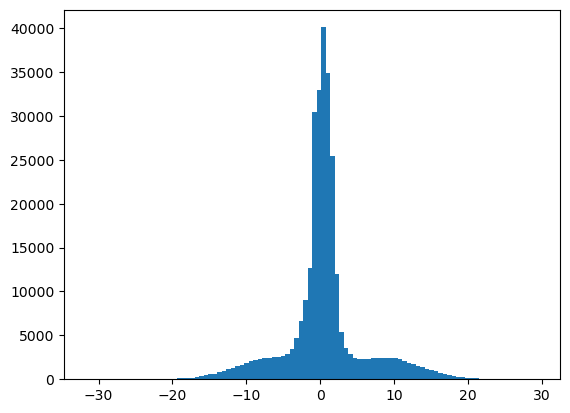

In [7]:
plt.hist(df.f0, bins=100)
plt.show()

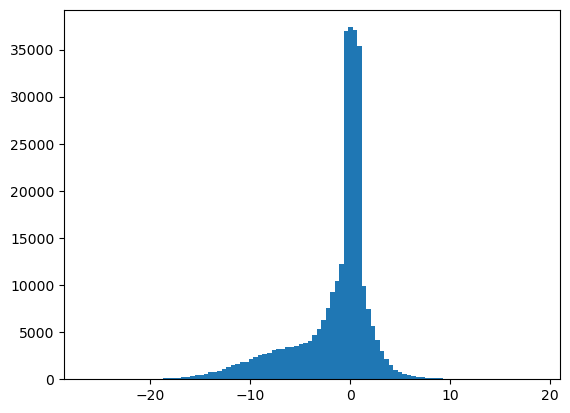

In [11]:
plt.hist(df.f1, bins=100)
plt.show()

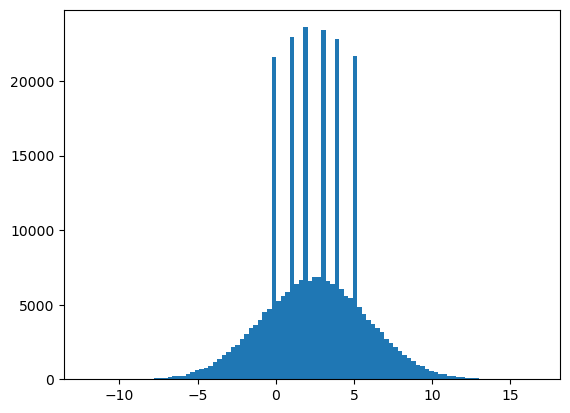

In [60]:
plt.hist(df.f2, bins=100)
plt.show()

thoughts
___
Standard scaler will work for all three categories

In [59]:
#########
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [8]:
# scale features using standardscaler
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)

# scale all three test sets
feature_test_scaled_1 = scaler.transform(feature_test_1)
feature_test_scaled_2 = scaler.transform(feature_test_2)
feature_test_scaled_3 = scaler.transform(feature_test_3)
feature_test_scaled = scaler.transform(feature_test)

In [60]:
#########
# train the model on ALL the data: feature_train, target_train

# initalize the models for linear regression
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=10)
ridge = RidgeCV(alphas=[10, 11, 12, 13, 14, 15, 16, 17], cv=10)

# fit the models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# predict
lasso_predict = lasso.predict(X_test_scaled)
ridge_predict = ridge.predict(X_test_scaled)

# evaluate the predictions
rmse_lasso = root_mean_squared_error(y_test, lasso_predict)
rmse_ridge = root_mean_squared_error(y_test, ridge_predict)

r2_lasso = r2_score(y_test, lasso_predict)
r2_ridge = r2_score(y_test, ridge_predict)

# print metrics
print("RidgeCV:")
print(f"  Optimal Alpha: {ridge.alpha_}")
print(f"  RMSE: {rmse_ridge}")
print(f"  R-squared: {r2_ridge}")
print()
print("LassoCV:")
print(f"  Optimal Alpha: {lasso.alpha_}")
print(f"  RMSE: {rmse_lasso}")
print(f"  R-squared: {r2_lasso}")

if rmse_ridge < rmse_lasso:
    print("\nRidgeCV performs better (lower RMSE).")
elif rmse_lasso < rmse_ridge:
    print("\nLassoCV performs better (lower RMSE).")
else:
    print("\nRidgeCV and LassoCV have similar performance.")

RidgeCV:
  Optimal Alpha: 16
  RMSE: 37.64788180576745
  R-squared: 0.28129679807798114

LassoCV:
  Optimal Alpha: 0.001
  RMSE: 37.64786793303659
  R-squared: 0.2812973277425346

LassoCV performs better (lower RMSE).


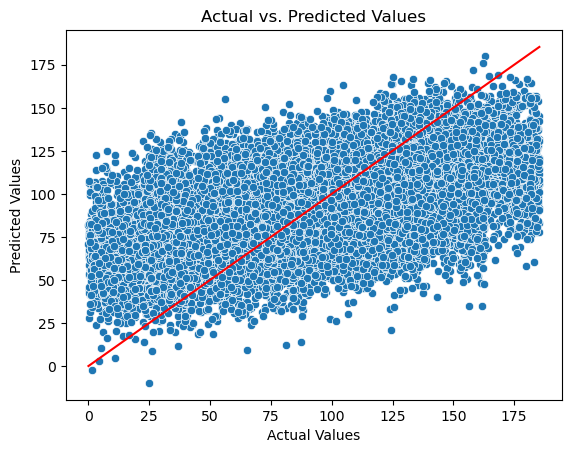

In [61]:

import seaborn as sns

# Assuming 'predictions' and 'target_test' are your predicted and actual values

sns.scatterplot(x=y_test, y=ridge_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(
    y_test)], color='red')  # adds a perfect prediction line.
plt.show()

In [36]:
ridge_predict.mean() - y_test.mean()

0.006225393306678484

In [9]:
# train the model on ALL the data: feature_train, target_train

# initalize the models for linear regression
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)

# fit the models
lasso.fit(feature_train_scaled, target_train)
ridge.fit(feature_train_scaled, target_train)

# predict
lasso_predict = lasso.predict(feature_test_scaled)
ridge_predict = ridge.predict(feature_test_scaled)

# evaluate the predictions
rmse_lasso = root_mean_squared_error(target_test, lasso_predict)
rmse_ridge = root_mean_squared_error(target_test, ridge_predict)

r2_lasso = r2_score(target_test, lasso_predict)
r2_ridge = r2_score(target_test, ridge_predict)

# print metrics
print("RidgeCV:")
print(f"  Optimal Alpha: {ridge.alpha_}")
print(f"  RMSE: {rmse_ridge}")
print(f"  R-squared: {r2_ridge}")
print()
print("LassoCV:")
print(f"  Optimal Alpha: {lasso.alpha_}")
print(f"  RMSE: {rmse_lasso}")
print(f"  R-squared: {r2_lasso}")

if rmse_ridge < rmse_lasso:
    print("\nRidgeCV performs better (lower RMSE).")
elif rmse_lasso < rmse_ridge:
    print("\nLassoCV performs better (lower RMSE).")
else:
    print("\nRidgeCV and LassoCV have similar performance.")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.918e+06, tolerance: 4.867e+04
  model = cd_fast.enet_coordinate_descent(


RidgeCV:
  Optimal Alpha: 10.0
  RMSE: 37.52368395540156
  R-squared: 0.3500478225850754

LassoCV:
  Optimal Alpha: 0.001
  RMSE: 37.52370569980678
  R-squared: 0.35004706931001695

RidgeCV performs better (lower RMSE).


In [10]:
# what are the best features for ridge?

# initalize the models for linear regression
rng = list(range(1, 30))
ridge = RidgeCV(alphas=rng, cv=5)

# fit the model
ridge.fit(feature_train_scaled, target_train)

# predict
ridge_predict = ridge.predict(feature_test_scaled)

# evaluate the predictions
rmse_ridge = root_mean_squared_error(target_test, ridge_predict)
r2_ridge = r2_score(target_test, ridge_predict)

# print metrics
print("RidgeCV:")
print(f"  Optimal Alpha: {ridge.alpha_}")
print(f"  RMSE: {rmse_ridge}")
print(f"  R-squared: {r2_ridge}")
print()
print(
    f"average oil reserve volume prediction is {ridge_predict.mean():.3f} thousand barrels")

RidgeCV:
  Optimal Alpha: 15
  RMSE: 37.523685398045544
  R-squared: 0.3500477726086597

average oil reserve volume prediction is 85.287 thousand barrels


In [37]:
# predict for each location

# same set up as best trained model
model = Ridge(alpha=110)
model.fit(feature_train_scaled, target_train)

# predict for each location

# location 1
predict_1 = model.predict(feature_test_scaled_1)
rmse_1 = root_mean_squared_error(target_test_1, predict_1)
r2_1 = r2_score(target_test_1, predict_1)

# location 2
predict_2 = model.predict(feature_test_scaled_2)
rmse_2 = root_mean_squared_error(target_test_2, predict_2)
r2_2 = r2_score(target_test_2, predict_2)
# location 3
predict_3 = model.predict(feature_test_scaled_3)
rmse_3 = root_mean_squared_error(target_test_3, predict_3)
r2_3 = r2_score(target_test_3, predict_3)

print('location 1')
print(f"  RMSE: {rmse_1}")
print(f"  R-squared: {r2_1}")
print(
    f"Average oil reserve volume prediction is {predict_1.mean():.3f} thousand barrels")
print(
    f"Actual average oil reserve {target_test_1.mean():.3f} thousand barrels")
print()
print('location 2')
print(f"  RMSE: {rmse_2}")
print(f"  R-squared: {r2_2}")
print(
    f"Average oil reserve volume prediction is {predict_2.mean():.3f} thousand barrels")
print(
    f"Actual average oil reserve {target_test_2.mean():.3f} thousand barrels")
print()
print('location 3')
print(f"  RMSE: {rmse_3}")
print(f"  R-squared: {r2_3}")
print(
    f"Average oil reserve volume prediction is {predict_3.mean():.3f} thousand barrels")
print(
    f"Actual average oil reserve {target_test_2.mean():.3f} thousand barrels")

location 1
  RMSE: 39.300976671546685
  R-squared: 0.21139031376796757
Average oil reserve volume prediction is 92.300 thousand barrels
Actual average oil reserve 92.350 thousand barrels

location 2
  RMSE: 31.37825287342274
  R-squared: 0.5315263005154582
Average oil reserve volume prediction is 68.787 thousand barrels
Actual average oil reserve 68.293 thousand barrels

location 3
  RMSE: 41.23598150936527
  R-squared: 0.15015530047451664
Average oil reserve volume prediction is 94.988 thousand barrels
Actual average oil reserve 68.293 thousand barrels


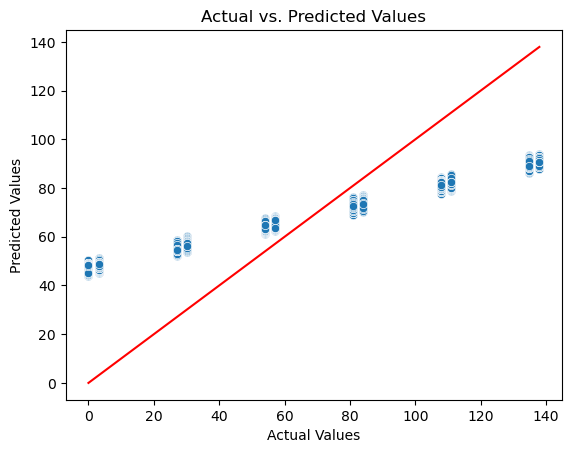

In [50]:

import seaborn as sns

# Assuming 'predictions' and 'target_test' are your predicted and actual values

sns.scatterplot(x=target_test_2, y=predict_2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(target_test_2), max(target_test_2)], [min(target_test_2), max(
    target_test_2)], color='red')  # adds a perfect prediction line.
plt.show()

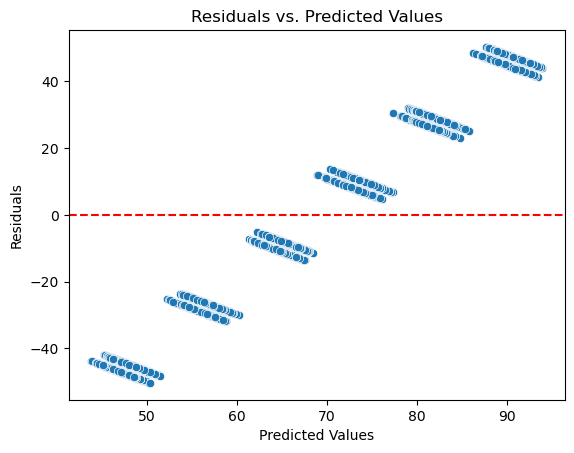

In [49]:
residuals = target_test_2 - predict_2

sns.scatterplot(x=predict_2, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

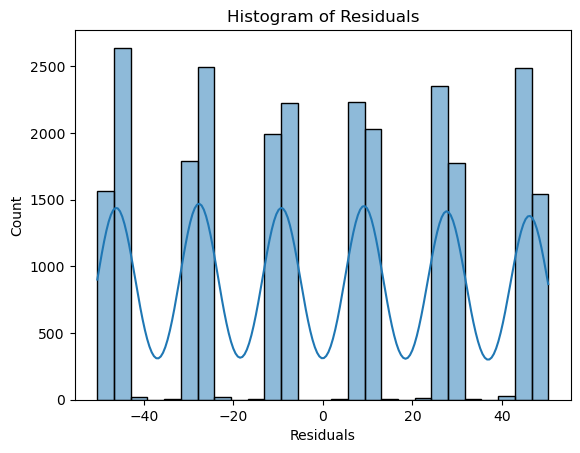

In [51]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

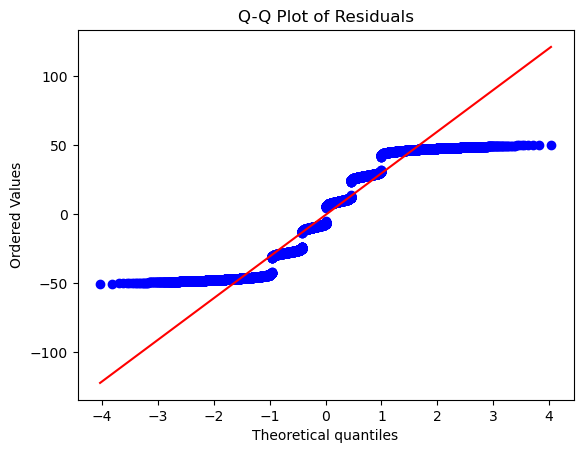

In [52]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()